In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt # for plotting
import numpy as np # for matrix and vector computations
import pandas as pd
import seaborn as sns

### Debugging

* Python array indices start from zero
* Vector/matrix operations work only with numpy arrays.Inspect matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of numpy arrays using the shape property will help you debug.
* If you want to do matrix multiplication, you need to use the dot function in numpy. For, example if A and B are two numpy matrices, then the matrix operation AB is np.dot(A, B)

## Return a 5x5 Identity Matrix

In [3]:
A = np.eye(5) # using eye()
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file Data/ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.


## 1) Load the dataset

In [4]:
# Load the dataset
data = np.loadtxt('ex1data1.txt',delimiter=',')
X = data[:,0]
y = data[:,1]

# X and y are matrices 

In [5]:
m = y.size # number of training samples
m

97

In [6]:
X.shape, y.shape, X.ndim, y.ndim

((97,), (97,), 1, 1)

## 2) Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset has only two properties to plot (profit and population).

In [ ]:
"""
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """

In [8]:
def plotData(x,y):
  fig = plt.figure(figsize=(8,6))
  plt.plot(x,y,'ro',ms=10,mec='k')
  plt.xlabel('Profit in $10,000')
  plt.ylabel('Population of a city in 10,000')

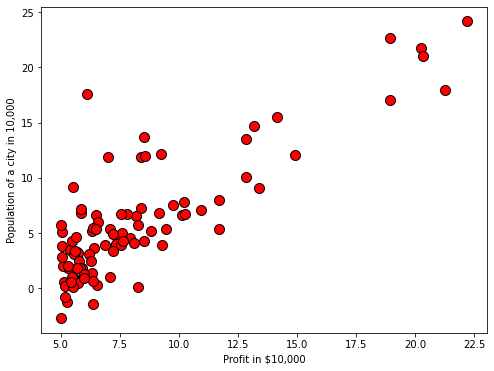

In [9]:
plotData(X,y)

## 3) Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent.

<a id="section2"></a>
### 3.1 Update Equations

The objective of linear regression is to minimize the cost function $J(\theta)$

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the **batch gradient descent algorithm**. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each sample as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


In [10]:
# initially X contains features x1,x2. Add x0 = 1, so X will now contain the features x0,x1,x2

#### Add a column of ones to X. The numpy function stack() joins arrays along a given axis. 

# The first axis (axis=0) refers to rows (training samples), and second axis (axis=1) refers to columns (features).

X = np.stack([np.ones(m),X],axis=1) # This cell is executed only once!

<a id="section2"></a>
### 3.2 Computing the cost $J(\theta)$

As you perform gradient descent to minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. Implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the samples from the training set (feature) and $y$ (label) is a vector whose each element represent the value at a given row of $X$.
<a id="computeCost"></a>

In [ ]:
"""
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1) dimesnions, where m is the number of samples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ) i.e. (mx1) dimensions
    
    theta : array_like
        The parameters for the hypothesis/regression function. This is a vector of 
        shape (n+1, ) i.e. (n+1)x1 dimensions.
    
    Returns
    -------
    J : float - The value of the regression cost function.
    """

In [12]:
def computeCost(X,y,theta):
  m = y.size # no. of training samples
  J = 0

  h = np.dot(X,theta) # X and theta are matrices
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J


In [13]:
# take random values of theta0 and theta1

J = computeCost(X,y ,theta=np.array([0.0,0.0])) # two values for theta0 and theta1
print(f"With theta = [0, 0] \nCost computed = {J:.2f}")
print()

J = computeCost(X,y ,theta=np.array([-1,2])) 
print(f"With theta = [-1, 2] \nCost computed = {J:.2f}")

With theta = [0, 0] 
Cost computed = 32.07

With theta = [-1, 2] 
Cost computed = 54.24


<a id="section3"></a>
### 3.3 Gradient descent

Complete a function which Implements gradient descent. Update $\theta$ with each iteration of the loop. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. 

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 


In [ ]:
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ), i.e. (mx1) dimensions
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ), i.e. (n+1)x1 dimensions
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ). This is the optimal theta
        for which J is minimum
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """

In [18]:
def gradient_descent(X,y,theta,alpha,num_iters):
  m = y.size # or y.shape[0] # number of training samples

  # make a copy of theta, to avoid changing the original array, since numpy arrays are passed by reference to functions
  theta = theta.copy()

  J_history = [] # Use a python list to store cost in every iteration

  for i in range(num_iters):
    theta = theta - (alpha/m) * (np.dot(X,theta) - y).dot(X)
    # print(theta)

    # save the cost J in every iteration
    min_cost = computeCost(X,y,theta)
    J_history.append(min_cost)
    # print(J_history[i])

  return theta, J_history # theta will return 2 values --> theta0, theta1

In [20]:
# randomly initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(X,y,theta,alpha,iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta)) # adds theta to empty string

Theta found by gradient descent: -3.6303, 1.1664


## 4) Plot the linear fit

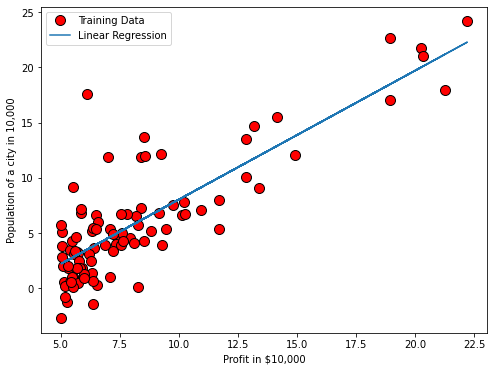

In [27]:
plotData(X[:,1],y) # plot the samples - excluding x1=0 (0th column)

# Linear regression line/hypothesis line of best fit  --> y = h(x) = theta0 + theta1*X
# x is feature except x1=0,y is entire equation
plt.plot(X[:,1],np.dot(X,theta),ls='-') 

plt.legend(['Training Data','Linear Regression']); # x is training data, y is linear regression line

## 5) Predict some values

In [30]:
# we now have the optimal theta

# Predict values for population sizes of 35,000 and 70,000

# Note that the first argument to the `numpy` function `dot` is a python list. 
# `numpy` can internally convert **valid** python lists to numpy arrays when explicitly provided as arguments to `numpy` functions.

# profit x in 10,000 and population y in 10,000, so 3.5 --> 350000, 1 -> 10000
predict1 = np.dot([1,3.5],theta)
print(f"For population = 35,000, we predict a profit of {predict1 * 10000:.2f}")

predict2 = np.dot([1,7],theta)
print(f"For population = 35,000, we predict a profit of {predict2 * 10000:.2f}")

For population = 35,000, we predict a profit of 4519.77
For population = 35,000, we predict a profit of 45342.45
